# Regresión

In [1]:
import torch
import matplotlib.pyplot as plt

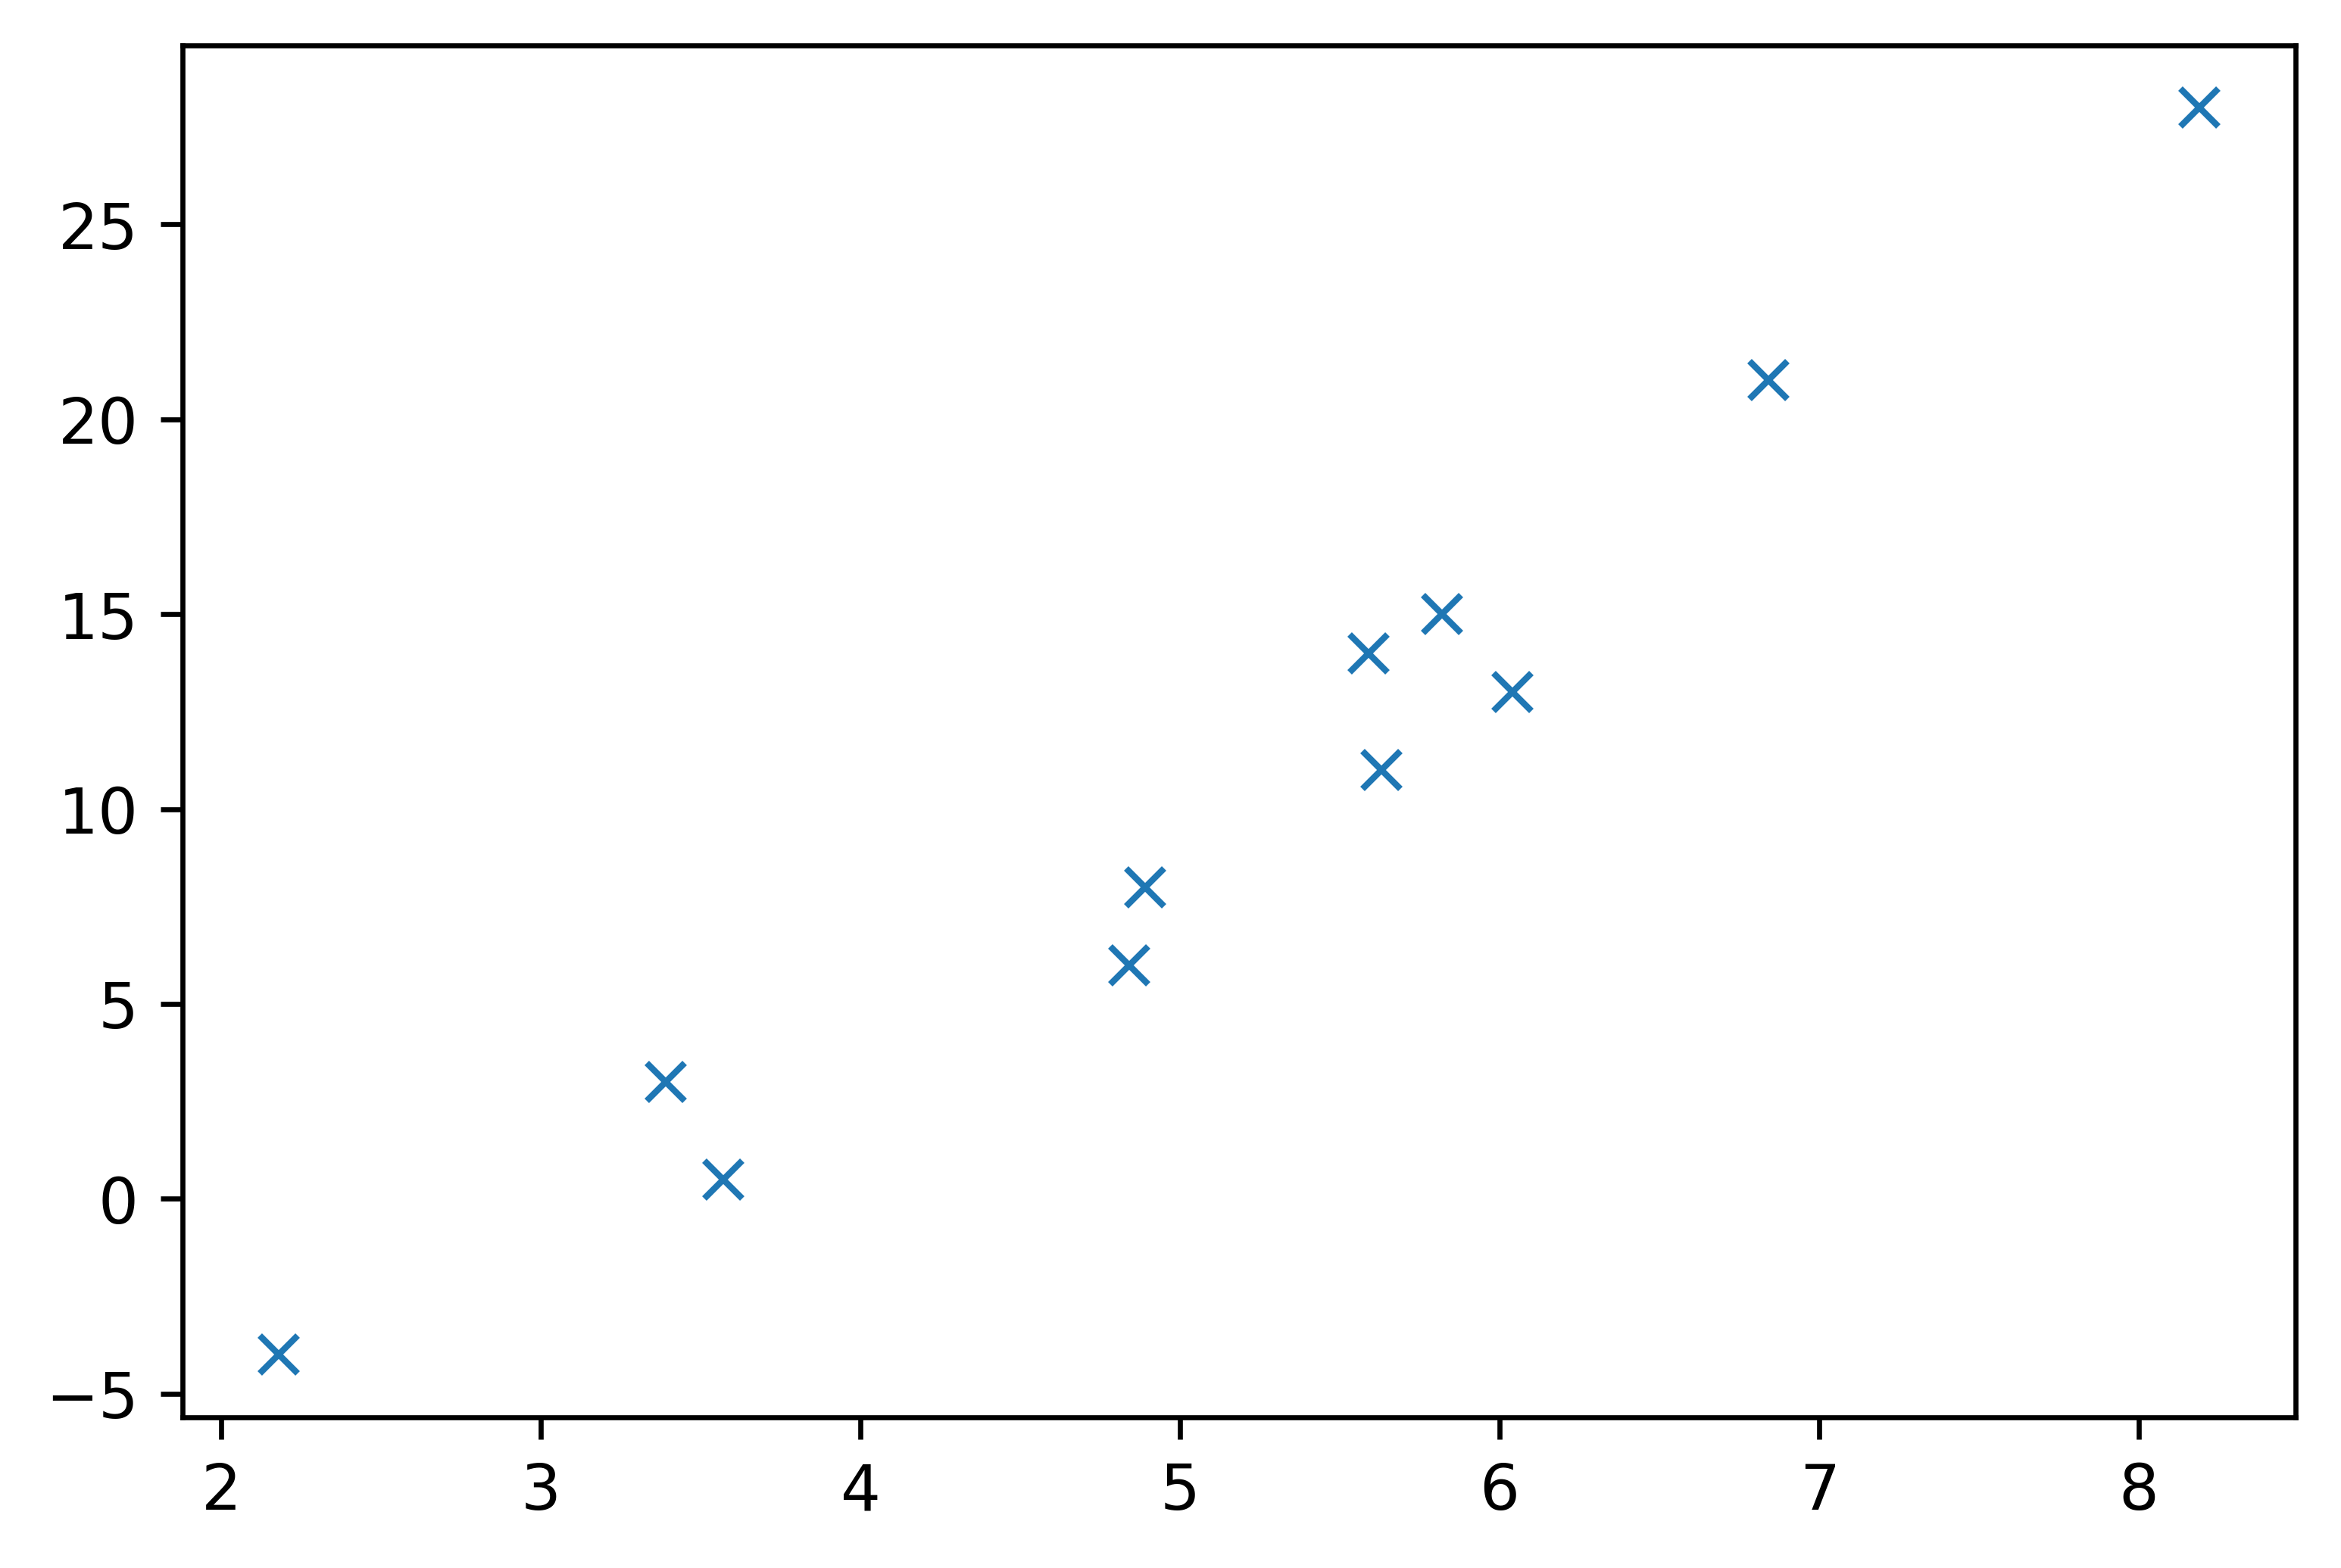

In [20]:
torch.random.manual_seed(100) # Seleccionamos una semilla para que sea reproducible
x = torch.rand(10) # Elementos aleatorios (uniforme) en [0, 1)
y = torch.sin(4*x) + x
y = 2 * x - 2
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
x = torch.tensor(t_u)
x = 0.1 * x
y = torch.tensor(t_c)
# y = (y-y.mean())/y.std()
plt.figure(dpi=600)
plt.plot(x, y, 'x')
plt.show()

In [21]:
def model(x, w, b):
    return w * x + b

def loss_fn(y_real, y_pred):
    squared_diffs = (y_real - y_pred)**2
    return squared_diffs.mean()

In [22]:
w = torch.rand(1)
b = torch.rand(1)

y_pred = model(x, w, b)
y_pred

tensor([1.1700, 1.4159, 1.4439, 1.7323, 1.4207, 1.3307, 1.1481, 1.0009, 1.3246,
        1.4706, 1.5680])

In [23]:
2.8/0.1

27.999999999999996

In [24]:
loss = loss_fn(y, y_pred)
loss

tensor(157.2400)

Lo que queremos es obtener los parámetros w y b óptimos para nuestro modelo. Esto se consigue minimizando la pérdida respecto a los parámetros (esto se llama backpropagation). Obtenemos las derivadas (gradiente) respecto a los parámetros, y actualizamos los parámetros dando un paso en el gradiente (esto se llama gradiente descendente).

In [25]:
def dloss_fn(y_real, y_pred):
    dsq_diffs = 2 * (y_pred - y_real) / y.size(0)
    return dsq_diffs

def dmodel_dw(x, w, b):
    return x

def dmodel_db(x, w, b):
    return 1.0

def grad_fn(y, y_pred, x, w, b):
    dloss_dy = dloss_fn(y, y_pred)
    dloss_dw = dloss_dy * dmodel_dw(x, w, b)
    dloss_db = dloss_dy * dmodel_db(x, w, b)
    # print(dloss_dw, dloss_db)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  

In [26]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        y_pred = model(x, w, b)  # <1>
        loss = loss_fn(y, y_pred)
        grad = grad_fn(y, y_pred, x, w, b)  # <2>
        
        # print(grad)

        params = params - learning_rate * grad
        
        if epoch % 100 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [27]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    x = x, 
    y = y)

Epoch 100, Loss 22.148710
Epoch 200, Loss 16.608067
Epoch 300, Loss 12.664559
Epoch 400, Loss 9.857804
Epoch 500, Loss 7.860115
Epoch 600, Loss 6.438284
Epoch 700, Loss 5.426309
Epoch 800, Loss 4.706046
Epoch 900, Loss 4.193405
Epoch 1000, Loss 3.828538
Epoch 1100, Loss 3.568848
Epoch 1200, Loss 3.384018
Epoch 1300, Loss 3.252462
Epoch 1400, Loss 3.158830
Epoch 1500, Loss 3.092191
Epoch 1600, Loss 3.044759
Epoch 1700, Loss 3.011001
Epoch 1800, Loss 2.986974
Epoch 1900, Loss 2.969871
Epoch 2000, Loss 2.957698
Epoch 2100, Loss 2.949035
Epoch 2200, Loss 2.942870
Epoch 2300, Loss 2.938481
Epoch 2400, Loss 2.935356
Epoch 2500, Loss 2.933134
Epoch 2600, Loss 2.931554
Epoch 2700, Loss 2.930426
Epoch 2800, Loss 2.929626
Epoch 2900, Loss 2.929054
Epoch 3000, Loss 2.928648
Epoch 3100, Loss 2.928361
Epoch 3200, Loss 2.928154
Epoch 3300, Loss 2.928006
Epoch 3400, Loss 2.927904
Epoch 3500, Loss 2.927830
Epoch 3600, Loss 2.927776
Epoch 3700, Loss 2.927739
Epoch 3800, Loss 2.927713
Epoch 3900, Loss 2

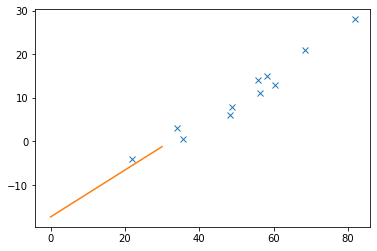

In [28]:
x_grid = torch.linspace(0, 3, 100)
y_pred = params[0] * x_grid + params[1]
plt.plot(x/0.1, y, 'x')
plt.plot(x_grid/0.1, y_pred)
plt.show()

In [14]:
params

tensor([17.9230, 32.9808])